https://scikit-learn.org/1.5/modules/neural_networks_supervised.html

In [1]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 33.8 MB/s eta 0:00:00


In [2]:
import os
from nilearn import plotting
from nilearn import image
from nilearn.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import nibabel as nib
import pandas as pd
from sklearn import svm
from sklearn import metrics

In [3]:
# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas_1sujeto")
menstr = r'/content/drive/MyDrive/intento_cosas_1sujeto/dc_met3_1.csv'
prolif = r'/content/drive/MyDrive/intento_cosas_1sujeto/dc_met3_2.csv'
luteo = r'/content/drive/MyDrive/intento_cosas_1sujeto/dc_met3_3.csv'

!ls

Mounted at /content/drive
alff_met2_1.csv  alff_met5_1.csv  dc_met2_1.csv  dc_met5_1.csv	reho_met2_1.csv  reho_met5_1.csv
alff_met2_2.csv  alff_met5_2.csv  dc_met2_2.csv  dc_met5_2.csv	reho_met2_2.csv  reho_met5_2.csv
alff_met2_3.csv  alff_met5_3.csv  dc_met2_3.csv  dc_met5_3.csv	reho_met2_3.csv  reho_met5_3.csv
alff_met3_1.csv  alff_met6_1.csv  dc_met3_1.csv  dc_met6_1.csv	reho_met3_1.csv  reho_met6_1.csv
alff_met3_2.csv  alff_met6_2.csv  dc_met3_2.csv  dc_met6_2.csv	reho_met3_2.csv  reho_met6_2.csv
alff_met3_3.csv  alff_met6_3.csv  dc_met3_3.csv  dc_met6_3.csv	reho_met3_3.csv  reho_met6_3.csv


In [4]:
data_lut = pd.read_csv(luteo, index_col=0)
data_lut = data_lut.sort_values(['file_name'])
data_lut

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
./dc_103515_sub0.nii.gz,132458.03000,352323.300,149395.100,300106.440,716422.44,144280.390,19070.803,189662.480,62292.7770,142295.7500,...,40858.800,166389.300,86564.9800,272348.00,217840.380,186725.4000,339850.440,152209.720,90528.47,2
./dc_104820_sub0.nii.gz,116066.18000,144959.420,182594.190,69527.120,187253.94,36093.710,56460.530,337665.280,-4843.9707,182496.8600,...,70813.660,102671.020,185381.6900,359542.84,180775.080,353391.1200,179121.480,113124.490,342921.56,2
./dc_105923_sub0.nii.gz,-30580.19700,243869.170,301503.400,138352.600,221473.40,47846.254,84465.020,125712.670,66072.2500,163656.5300,...,18992.910,537544.250,-22887.2850,420613.62,302242.560,256054.2800,526861.060,226112.800,341648.38,2
./dc_114217_sub0.nii.gz,-46984.40600,92506.050,151139.080,96244.516,100544.83,54118.312,144581.890,177261.330,55262.2100,505568.7500,...,53217.816,564908.300,-19772.2340,669845.25,307209.060,144031.4700,364728.880,505155.440,284776.50,2
./dc_120111_sub0.nii.gz,210.35928,264859.970,310572.160,220946.550,326094.97,76559.016,227177.730,188958.380,147336.4500,20220.5500,...,57377.156,191786.970,42511.7580,269758.80,182241.200,213639.3400,318736.220,286942.470,136861.45,2
./dc_128026_sub0.nii.gz,78990.23400,269101.530,171880.580,446618.380,261129.77,199869.730,236144.250,404361.440,69928.0000,128447.4000,...,84606.520,119796.086,-19215.7850,138385.45,288684.800,80542.3600,122437.790,217404.830,170613.25,2
./dc_133019_sub0.nii.gz,690658.80000,45905.105,280843.000,17091.826,103557.61,10800.207,644228.250,74137.170,-52464.0160,276120.5600,...,148505.500,226049.940,-52508.7270,129289.02,170017.900,-940.3164,54950.555,962475.060,276149.84,2
./dc_135528_sub0.nii.gz,-31524.59000,243596.440,139424.470,425298.660,318762.44,153253.840,33936.566,162392.060,32567.7660,27754.2800,...,61367.140,283766.300,112968.8000,327829.75,226276.780,156325.1700,196359.100,286787.780,190952.11,2
./dc_136732_sub0.nii.gz,364178.78000,150031.400,280442.470,394015.800,148492.25,259425.750,145008.600,81350.240,212089.6100,123392.8800,...,237655.810,32436.012,-63038.0400,176643.81,30621.523,23951.6020,35823.450,101636.190,500777.28,2


In [5]:
data_men = pd.read_csv(menstr, index_col=0)
data_men = data_men.sort_values(['file_name'])
data_men

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
./dc_114823_sub0.nii.gz,2678.87260,406745.900,84066.160,366675.250,328767.100,123941.3000,61340.7300,101204.410,97015.7800,177925.470,...,14168.253,544391.200,8151.6640,379412.720,342777.16,305978.600,277908.0300,131587.4000,2.194290e+05,0
./dc_117122_sub0.nii.gz,46393.38000,102665.555,139224.860,456699.530,133267.330,270039.2500,48088.2340,133348.380,259395.5200,43117.010,...,44052.030,128952.450,91259.0600,265574.120,102609.78,117681.660,100568.8360,518018.1600,5.388738e+04,0
./dc_124826_sub0.nii.gz,-39833.83200,329485.160,299543.250,192247.480,354742.400,116237.5800,81170.2700,215091.000,33406.9100,40621.500,...,63235.695,251614.340,1302.0977,347797.440,210679.44,274233.380,285454.2500,206097.8300,1.020189e+05,0
./dc_125424_sub0.nii.gz,108666.05500,146382.830,213553.330,167847.190,165391.360,65407.0940,172676.0500,138889.780,45460.6000,357518.470,...,87049.050,263373.780,-3125.8252,530793.940,342457.78,104561.330,186441.3300,388547.2000,6.721706e+05,0
./dc_159845_sub0.nii.gz,95641.58000,248428.380,245820.330,296261.200,137484.390,356445.0000,14321.0430,111306.195,-8792.3820,26165.744,...,78216.836,58732.477,194275.8400,177126.220,346328.80,-23343.426,651497.9000,55052.8300,1.345949e+05,0
./dc_173839_sub0.nii.gz,-64362.67000,173506.500,147533.950,217209.520,146422.620,118317.4600,242766.2000,156579.750,95146.4100,464347.560,...,32953.652,479468.100,24336.6390,455489.940,133139.88,78967.970,200667.2300,647791.7500,3.059881e+05,0
./dc_181131_sub0.nii.gz,1496.55420,97112.914,203390.390,284436.620,166513.520,158822.8600,658347.9400,68102.390,109259.8750,354486.100,...,162536.080,80489.930,-9332.2860,57220.420,116403.00,31865.352,102240.3900,916354.7000,3.110153e+04,0
./dc_188448_sub0.nii.gz,76983.08000,226957.620,229158.060,184338.810,314808.660,95306.1600,47141.7850,149272.810,30871.5120,189201.840,...,48368.805,416504.060,99309.3300,697846.560,156805.42,132037.880,252415.8900,190327.4700,3.649499e+05,0
./dc_192035_sub0.nii.gz,95390.41000,380975.300,137847.400,751910.060,579064.600,305374.3800,56608.4730,53394.863,42423.3630,106680.230,...,24535.102,122385.970,120311.5000,161004.080,242947.53,215668.330,258373.6100,151915.7700,7.938888e+04,0


In [6]:
data_pr = pd.read_csv(prolif, index_col=0)
data_pr = data_pr.sort_values(['file_name'])
data_pr

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_12,component_13,component_14,component_15,component_16,component_17,component_18,component_19,component_20,label
file_name,,,,,,,,,,,,,,,,,,,,,
./dc_101915_sub0.nii.gz,-44630.78500,228251.500,55091.5400,335836.200,184020.330,1.003398e+05,156630.560,121182.2800,26451.7640,444860.9000,...,21270.540,379616.16000,68461.79000,571104.900,275777.2500,199559.300,124134.8800,625151.100,220714.30000,1
./dc_128632_sub0.nii.gz,110598.91000,148578.190,92859.0700,106395.990,174633.340,1.147053e+05,249715.730,127328.7660,131362.4700,133002.8600,...,29270.510,374433.34000,-45.54297,374877.750,126085.6100,390741.340,111574.2500,188804.390,338395.56000,1
./dc_131419_sub0.nii.gz,130136.93000,140674.280,425917.1000,288060.340,235553.900,1.791351e+05,228406.890,90461.9400,-65789.2660,404661.5300,...,90987.780,207283.86000,39696.05000,192756.170,416965.4400,501259.800,110570.8050,332126.380,273463.25000,1
./dc_132017_sub0.nii.gz,22854.86000,116086.360,126789.5200,474937.970,361627.250,2.144236e+05,295024.600,131928.9700,37238.5040,203850.8100,...,102896.445,240706.14000,30375.95000,291481.220,141280.5500,79850.980,116598.7800,570159.700,146198.95000,1
./dc_139637_sub0.nii.gz,-116543.60000,154386.730,221602.7500,94533.490,110250.950,3.081560e+04,370848.500,284738.3000,196822.1900,741461.5600,...,35314.105,528583.40000,-75082.09000,768786.800,174364.9400,-14726.438,134919.2300,393365.200,269386.34000,1
./dc_149236_sub0.nii.gz,134903.58000,369593.300,94378.5200,361729.030,815071.200,2.024764e+05,50372.957,184924.5600,67007.8400,51318.7700,...,21235.074,165977.28000,138938.40000,196161.160,101536.0900,132317.110,302249.4400,107596.766,104507.21000,1
./dc_152427_sub0.nii.gz,158519.92000,201511.100,28915.4900,256833.380,341121.220,7.536948e+04,117965.460,192734.3300,59609.1000,145156.3400,...,32025.816,670832.30000,-13314.45700,311693.250,193041.1900,111119.484,332651.3800,302245.340,200934.27000,1
./dc_153126_sub0.nii.gz,83877.09000,113731.375,290452.2500,172329.140,273593.440,9.254820e+04,86861.750,365803.6600,-12227.1260,7714.3574,...,63957.457,348728.06000,30081.98000,381249.900,138954.3000,115608.570,234503.6400,159693.440,328540.50000,1
./dc_157942_sub0.nii.gz,-45899.22700,132311.400,260396.0000,80925.164,187872.440,2.209856e+04,204094.890,320522.2200,154862.8000,635121.0000,...,86583.870,597708.00000,-43180.85000,634190.400,424649.3800,-50550.570,221056.6700,624951.060,250531.67000,1


In [7]:
from sklearn.model_selection import train_test_split

# 2. Añadir una columna que indique el grupo al que pertenece cada muestra
#data_men['group'] = '0'
#data_pr['group'] = '1'
#data_lut['group'] = '2'

# 2. Definir función para tomar el primer tercio de un DataFrame
mens = 21 #int(len(data_men)*0.7)
prlof = 25 #int(len(data_pr)*0.7)
lut = 25 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train = data_men.iloc[:mens]
data_pr_train = data_pr.iloc[:prlof]
data_lut_train = data_lut.iloc[:lut]

data_men_test = data_men.iloc[mens:]
data_pr_test = data_pr.iloc[prlof:]
data_lut_test = data_lut.iloc[lut:]

df_all = pd.concat([data_men, data_pr, data_lut], ignore_index=True)
X = df_all.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y = df_all['label']  # Esta será nuestra etiqueta

# 4. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['label'] = 'menstrual'
data_pr['label'] = 'proliferativo'
data_lut['label'] = 'luteo'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train = pd.concat([data_men_train, data_pr_train, data_lut_train], ignore_index=True)
df_all_test = pd.concat([data_men_test, data_pr_test, data_lut_test], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train = df_all_train.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y_train = df_all_train['label']  # Esta será nuestra etiqueta

X_test = df_all_test.drop(columns=['label'])  # Eliminar la columna de grupo para usar solo las features
y_test = df_all_test['label']  # Esta será nuestra etiqueta

# 8. Ahora tienes tus sets de entrenamiento y testeo con el primer tercio de cada grupo:
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de testeo: {X_test.shape[0]} muestras")

Conjunto de entrenamiento: 71 muestras
Conjunto de testeo: 22 muestras


In [ ]:
print(X_train, y_train)
print(X_test, y_test)

    component_1  component_2  component_3  component_4  component_5  \
0     2678.8726   406745.900     84066.16    366675.25    328767.10   
1    46393.3800   102665.555    139224.86    456699.53    133267.33   
2   -39833.8320   329485.160    299543.25    192247.48    354742.40   
3   108666.0550   146382.830    213553.33    167847.19    165391.36   
4    95641.5800   248428.380    245820.33    296261.20    137484.39   
..          ...          ...          ...          ...          ...   
66  104942.7100   114173.730    214656.73    103975.49    146924.73   
67   21731.0330   258162.390    182396.53    282464.50    651841.44   
68   90635.7500   108390.375    154582.30    608331.70    283662.06   
69  229678.2500   133994.660    292127.56    458709.16    163532.77   
70  236093.4400   221736.480     22508.52    368892.22    275915.75   

    component_6  component_7  component_8  component_9  component_10  \
0    123941.300    61340.730   101204.410    97015.780    177925.470   
1  

In [8]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train = y_train.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

# Asignar los índices de y_train a X_train_scaled
X_train_scaled.index = y_train.index
print(X_train_scaled)


          0         1         2         3         4         5         6   \
0  -0.648618  0.942761 -0.888372  0.396850  0.494959 -0.189217 -0.652939   
1  -0.296647 -0.546337 -0.423287  0.829049 -0.932014  0.378375 -0.742366   
2  -0.990912  0.564411  0.928480 -0.440563  0.684555 -0.219146 -0.519131   
3   0.204747 -0.332251  0.203433 -0.557707 -0.697538 -0.416622  0.098342   
4   0.099879  0.167472  0.475501  0.058798 -0.901233  0.714061 -0.970224   
..       ...       ...       ...       ...       ...       ...       ...   
66  0.174768 -0.489981  0.212737 -0.864350 -0.832327 -0.329297  0.485314   
67 -0.495218  0.215140 -0.059274 -0.007439  2.853112 -0.000704 -0.708119   
68  0.059574 -0.518302 -0.293797  1.557022  0.165733  0.754740 -0.171262   
69  1.179087 -0.392917  0.865952  0.838697 -0.711104  0.212639 -0.356666   
70  1.230739  0.036760 -1.407412  0.407493  0.109191  0.162425 -0.491527   

          7         8         9         10        11        12        13  \
0  -0.51518

In [9]:
# Definir los índices correspondientes a cada grupo
grupo_1_indices = np.arange(0, mens) #np.arange(0, 51)   # Primer grupo (y_train = 0)
grupo_2_indices = np.arange(mens, mens +prlof) #np.arange(51, 132) # Segundo grupo (y_train = 1)
grupo_3_indices = np.arange(mens + prlof, mens + prlof + lut) #np.arange(132, 196) # Tercer grupo (y_train = 2)

print(grupo_1_indices)
print(grupo_2_indices)
print(grupo_3_indices)

# Extraer los subconjuntos de X_train_scaled correspondientes a cada grupo
grupo_1n = X_train.iloc[grupo_1_indices]
grupo_2n = X_train.iloc[grupo_2_indices]
grupo_3n = X_train.iloc[grupo_3_indices]

grupo_1 = X_train_scaled.iloc[grupo_1_indices]
grupo_2 = X_train_scaled.iloc[grupo_2_indices]
grupo_3 = X_train_scaled.iloc[grupo_3_indices]
# Imprimir los grupos
print("Grupo 1 (y_train = 0):")
print(grupo_1)

print("\nGrupo 2 (y_train = 1):")
print(grupo_2)

print("\nGrupo 3 (y_train = 2):")
print(grupo_3)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45]
[46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70]
Grupo 1 (y_train = 0):
          0         1         2         3         4         5         6   \
0  -0.648618  0.942761 -0.888372  0.396850  0.494959 -0.189217 -0.652939   
1  -0.296647 -0.546337 -0.423287  0.829049 -0.932014  0.378375 -0.742366   
2  -0.990912  0.564411  0.928480 -0.440563  0.684555 -0.219146 -0.519131   
3   0.204747 -0.332251  0.203433 -0.557707 -0.697538 -0.416622  0.098342   
4   0.099879  0.167472  0.475501  0.058798 -0.901233  0.714061 -0.970224   
5  -1.188408 -0.199425 -0.353227 -0.320722 -0.835992 -0.211065  0.571303   
6  -0.658137 -0.573529  0.117741  0.002029 -0.689347 -0.053702  3.375611   
7  -0.050351  0.062328  0.335008 -0.478532  0.393075 -0.300464 -0.748752   
8   0.097857  0.816561 -0.434902  2.246330  2.321906  0.515652 -0.684872

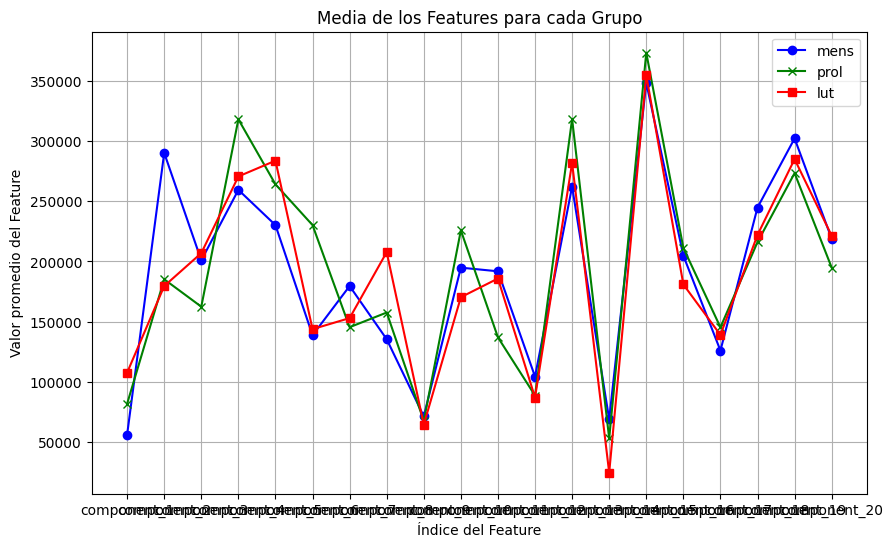

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

media_grupo_1n = np.mean(grupo_1n, axis=0)
media_grupo_2n = np.mean(grupo_2n, axis=0)
media_grupo_3n = np.mean(grupo_3n, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo
plt.plot(media_grupo_1n, marker='o', label='mens', color='blue')
plt.plot(media_grupo_2n, marker='x', label='prol', color='green')
plt.plot(media_grupo_3n, marker='s', label='lut', color='red')

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

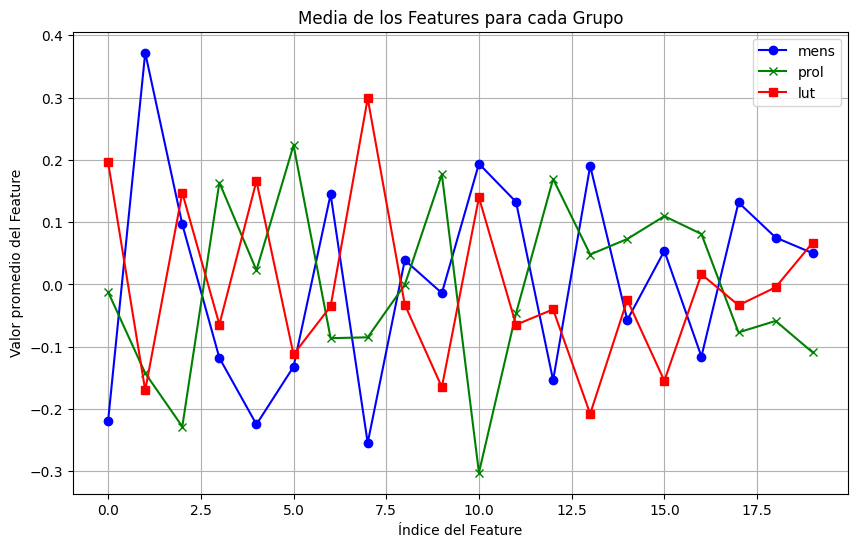

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

media_grupo_1 = np.mean(grupo_1, axis=0)
media_grupo_2 = np.mean(grupo_2, axis=0)
media_grupo_3 = np.mean(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo
plt.plot(media_grupo_1, marker='o', label='mens', color='blue')
plt.plot(media_grupo_2, marker='x', label='prol', color='green')
plt.plot(media_grupo_3, marker='s', label='lut', color='red')

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()



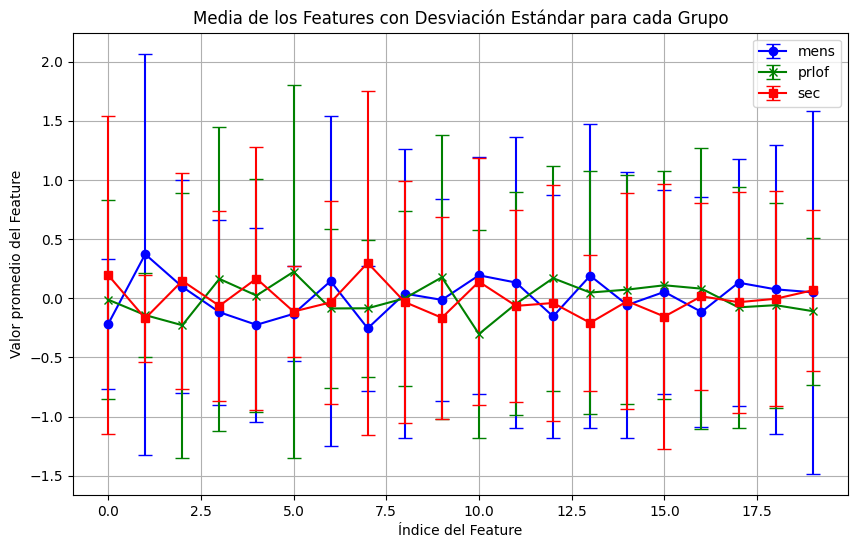

In [12]:
import numpy as np
import matplotlib.pyplot as plt

std_grupo_1 = np.std(grupo_1, axis=0)
std_grupo_2 = np.std(grupo_2, axis=0)
std_grupo_3 = np.std(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos con barras de error
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo con barras de error (desviación estándar)
plt.errorbar(range(len(media_grupo_1)), media_grupo_1, yerr=std_grupo_1, marker='o', label='mens', color='blue', capsize=5)
plt.errorbar(range(len(media_grupo_2)), media_grupo_2, yerr=std_grupo_2, marker='x', label='prlof', color='green', capsize=5)
plt.errorbar(range(len(media_grupo_3)), media_grupo_3, yerr=std_grupo_3, marker='s', label='sec', color='red', capsize=5)

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features con Desviación Estándar para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


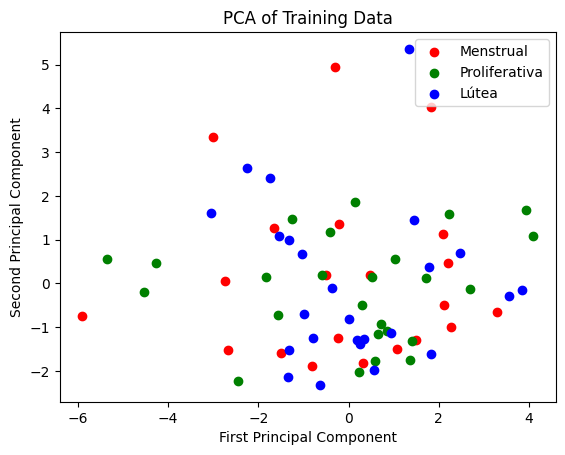

In [ ]:
# graficamos nuestra data a ver cómo se comporta

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Configurar los colores y etiquetas para cada grupo
colors = ['r', 'g', 'b']  # Elige los colores que representarán a los grupos
labels = ['Menstrual', 'Proliferativa', 'Lútea']  # Nombres de los grupos
unique_labels = np.unique(y_train)  # Obtener los grupos únicos

# Graficar y agregar la leyenda
for i, label in enumerate(unique_labels):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1],
                color=colors[i], label=labels[i])

plt.title('PCA of Training Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


In [ ]:
# este es para buscar los mejores parámetros para el svm.

from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Inicializar el modelo GridSearchCV con SVC
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)

# Entrenar el modelo con los datos originales (X_train_scaled)
grid.fit(X_train_scaled, y_train)

# Entrenar el modelo con los datos PCA (X_pca)
grid_pca = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid_pca.fit(X_pca, y_train)

# Mostrar los mejores parámetros y puntajes para cada caso
print("Mejores hiperparámetros (X_train_scaled):", grid.best_params_)
print("Mejor puntaje (X_train_scaled):", grid.best_score_)

print("Mejores hiperparámetros (X_pca):", grid_pca.best_params_)
print("Mejor puntaje (X_pca):", grid_pca.best_score_)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

In [ ]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled, y_train)
y_predict = classifier.predict(X_test_scaled)

In [ ]:
metrics.accuracy_score(y_test, y_predict)

0.5

In [ ]:
y_predict2 = grid.predict(X_test_scaled)

accuracy = metrics.accuracy_score(y_test, y_predict2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4090909090909091


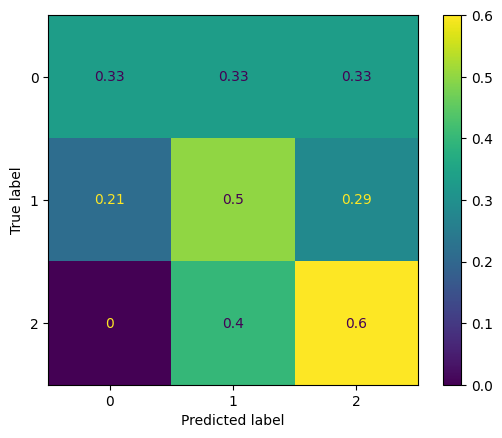

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

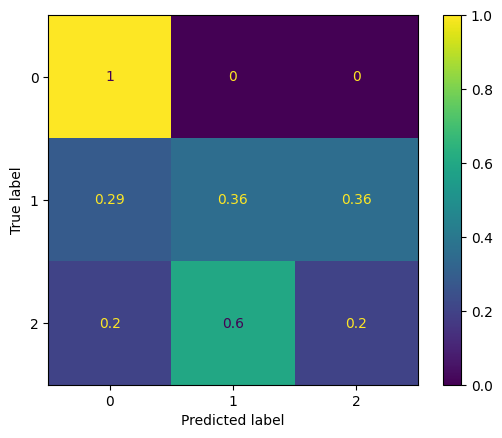

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
classif = svm.SVC()
classif.fit(X_pca, y_train)

X_test_pca = pca.transform(X_test_scaled)  # Asegúrate de transformar tu conjunto de prueba

y_pred_p = classif.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred_p)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6363636363636364


In [ ]:
y_pred2 = grid_pca.predict(X_test_pca)
accuracy = metrics.accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.36363636363636365


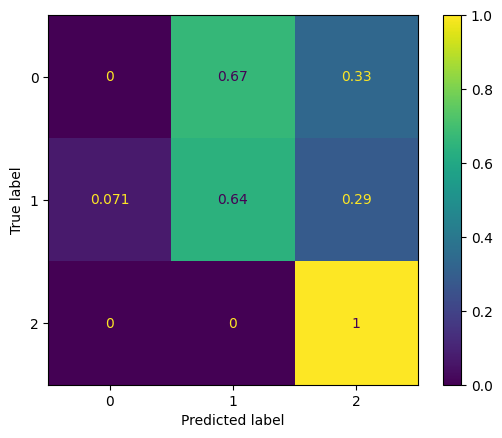

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_p, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

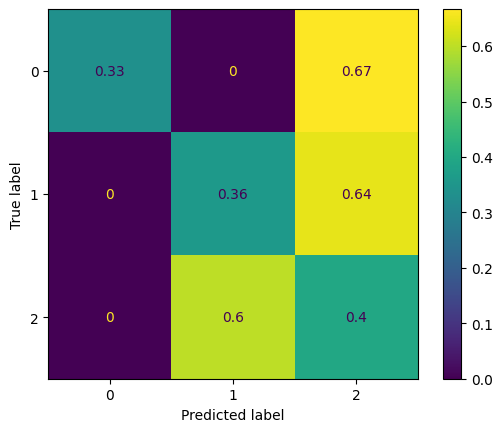

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

Ojo, puede que cross validation esté muy sobreajustado por estar usando a los mismos sujetos, quizá es mejor hacer los folds a mano

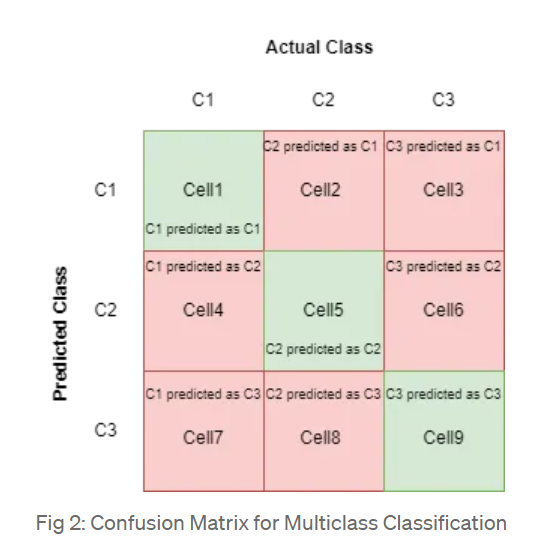

# Random Forest:

Probaremos ahora con otro modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_forest.predict(X_test)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5454545454545454
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.75      0.43      0.55        14
           2       0.57      0.80      0.67         5

    accuracy                           0.55        22
   macro avg       0.54      0.63      0.54        22
weighted avg       0.65      0.55      0.55        22



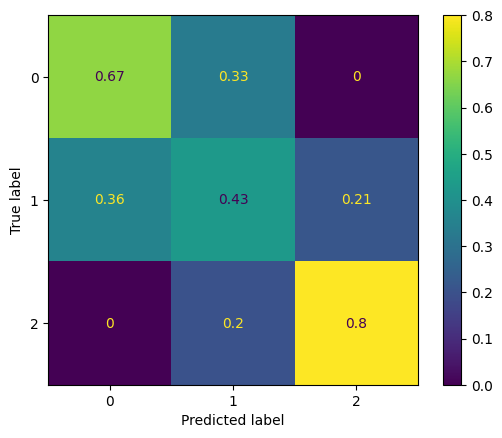

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

         Feature  Importance
2    component_3    0.080468
10  component_11    0.065753
19  component_20    0.063141
7    component_8    0.057673
1    component_2    0.056033
13  component_14    0.053193
11  component_12    0.053170
15  component_16    0.052681
3    component_4    0.050532
4    component_5    0.049270


In [ ]:
# data escalada
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_forest.predict(X_test_scaled)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5454545454545454
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.75      0.43      0.55        14
           2       0.57      0.80      0.67         5

    accuracy                           0.55        22
   macro avg       0.54      0.63      0.54        22
weighted avg       0.65      0.55      0.55        22



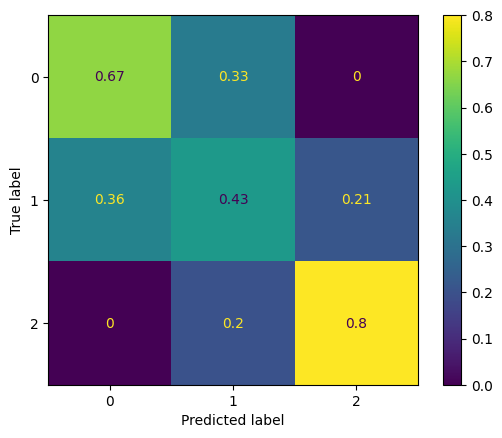

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
# pca

random_forest.fit(X_pca, y_train)

y_pred_p = random_forest.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred_p)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5


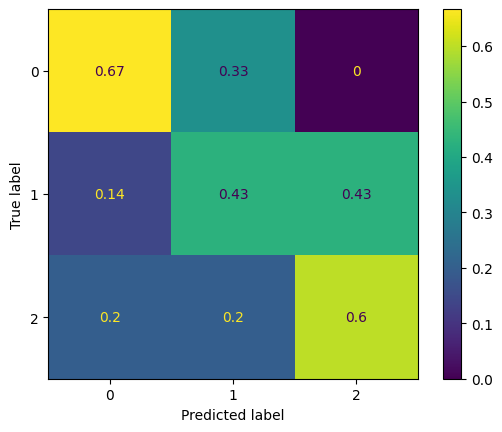

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_p, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
# data escalada
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_forest.predict(X_test_scaled)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5454545454545454
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.75      0.43      0.55        14
           2       0.57      0.80      0.67         5

    accuracy                           0.55        22
   macro avg       0.54      0.63      0.54        22
weighted avg       0.65      0.55      0.55        22



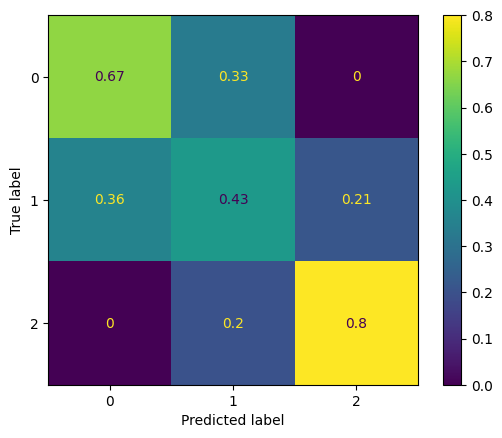

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
# pca

random_forest.fit(X_pca, y_train)

y_pred_p = random_forest.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred_p)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5


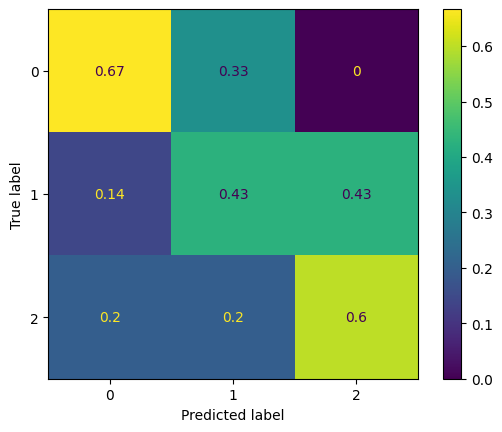

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_p, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
# data escalada
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_forest.predict(X_test_scaled)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5454545454545454
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.67      0.40         3
           1       0.75      0.43      0.55        14
           2       0.57      0.80      0.67         5

    accuracy                           0.55        22
   macro avg       0.54      0.63      0.54        22
weighted avg       0.65      0.55      0.55        22



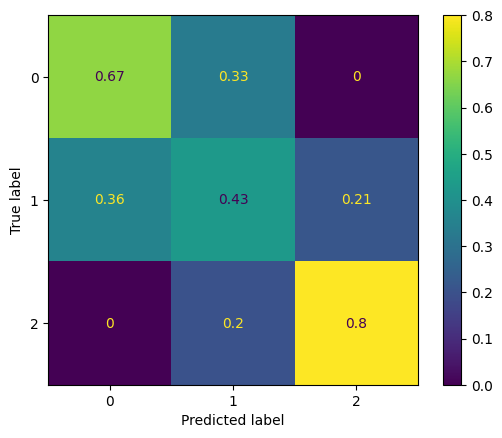

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
# pca

random_forest.fit(X_pca, y_train)

y_pred_p = random_forest.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred_p)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5


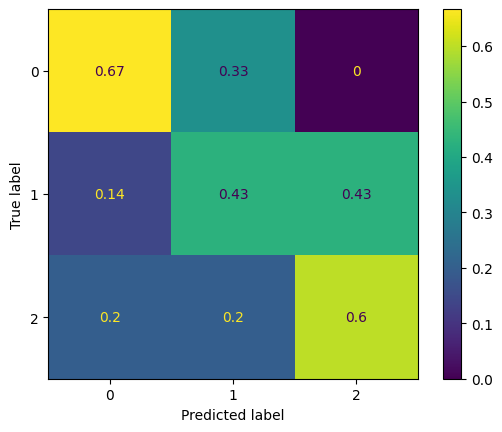

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred_p, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

## Meural Network

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convertir las etiquetas a one-hot encoding (ya que son 3 clases)
y_onehot = to_categorical(y_encoded)

# Dividir en sets de entrenamiento y prueba (X_train, X_test, y_train, y_test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled1, y_train1, epochs=50, batch_size=16, validation_data=(X_test_scaled1, y_test1))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled1, y_test1)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.5054 - loss: 1.0927 - val_accuracy: 0.4737 - val_loss: 1.2319
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3381 - loss: 1.0583 - val_accuracy: 0.3684 - val_loss: 1.1869
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4922 - loss: 1.0177 - val_accuracy: 0.3158 - val_loss: 1.1720
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5300 - loss: 0.9644 - val_accuracy: 0.3158 - val_loss: 1.1701
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5611 - loss: 0.9329 - val_accuracy: 0.3158 - val_loss: 1.1730
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5770 - loss: 0.9020 - val_accuracy: 0.3158 - val_loss: 1.1691
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5397 - loss: 0.9086 - val_accuracy: 0.3684 - val_loss: 1.1636
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5845 - loss: 0.8869 - val_accuracy: 0.3684 - val_loss: 1.1602

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Matriz de confusión:
[[3 0 3]
 [5 3 1]
 [3 1 0]]


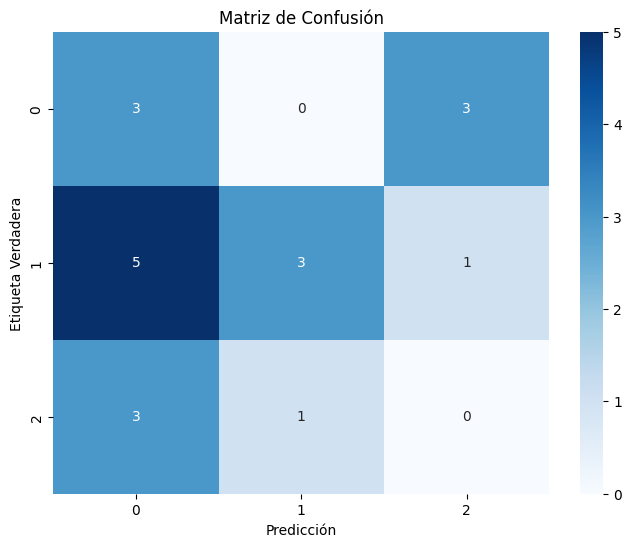

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled1)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_test1, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()



In [ ]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test = encoder.fit_transform(y_test)
y_encoded_train = encoder.fit_transform(y_train)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_onehot_test = to_categorical(y_encoded_test)
y_onehot_train = to_categorical(y_encoded_train)

print(y_onehot_test)
print(y_onehot_train)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0

In [ ]:

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_onehot_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_onehot_test))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_onehot_test)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.3705 - loss: 1.0871 - val_accuracy: 0.3182 - val_loss: 1.2163
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4280 - loss: 1.0666 - val_accuracy: 0.3636 - val_loss: 1.1381
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4412 - loss: 1.0586 - val_accuracy: 0.3636 - val_loss: 1.0857
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5532 - loss: 0.9986 - val_accuracy: 0.4091 - val_loss: 1.0518
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6493 - loss: 0.9662 - val_accuracy: 0.3636 - val_loss: 1.0258
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6960 - loss: 0.9294 - val_accuracy: 0.5000 - val_loss: 1.0090
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7274 - loss: 0.9148 - val_accuracy: 0.4091 - val_loss: 0.9925
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6965 - loss: 0.9150 - val_accuracy: 0.3182 - val_loss: 0.9832
Epoch 9/50

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Matriz de confusión:
[[1 1 1]
 [3 7 4]
 [0 2 3]]


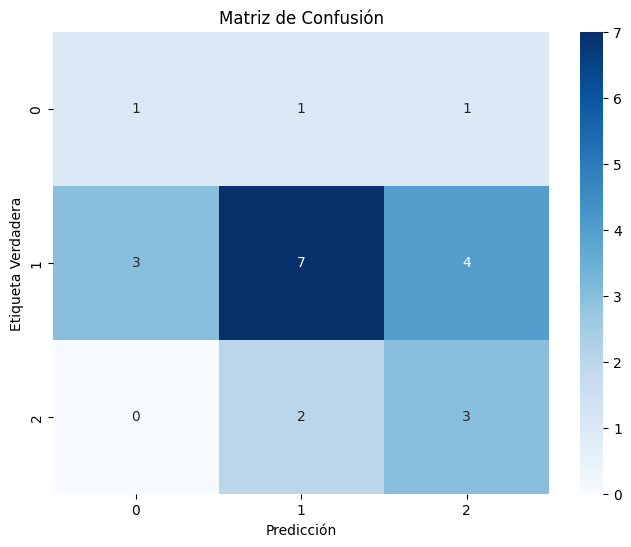

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo de red neuronal con capas adicionales
model = Sequential()

# Capa de entrada
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Capas ocultas adicionales
model.add(Dense(64, activation='relu'))  # Nueva capa oculta
model.add(Dense(32, activation='relu'))  # Nueva capa oculta
model.add(Dense(32, activation='relu'))  # Nueva capa oculta

# Capa oculta original
model.add(Dense(32, activation='relu'))

# Capa de salida (tres clases)
model.add(Dense(3, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    X_train_scaled, y_onehot_train,
    epochs=50, batch_size=16,
    validation_data=(X_test_scaled, y_onehot_test)
)

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_onehot_test)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 240ms/step - accuracy: 0.2946 - loss: 1.1103 - val_accuracy: 0.4091 - val_loss: 1.1042
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3903 - loss: 1.0811 - val_accuracy: 0.4091 - val_loss: 1.0903
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4914 - loss: 1.0587 - val_accuracy: 0.4091 - val_loss: 1.0845
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4723 - loss: 1.0525 - val_accuracy: 0.4545 - val_loss: 1.0841
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5230 - loss: 1.0260 - val_accuracy: 0.4545 - val_loss: 1.0806
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5529 - loss: 1.0055 - val_accuracy: 0.5000 - val_loss: 1.0799
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5993 - loss: 0.9827 - val_accuracy: 0.5000 - val_loss: 1.0828
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5425 - loss: 0.9588 - val_accuracy: 0.4545 - val_loss: 1.0809

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Matriz de confusión:
[[3 0 0]
 [3 7 4]
 [2 1 2]]


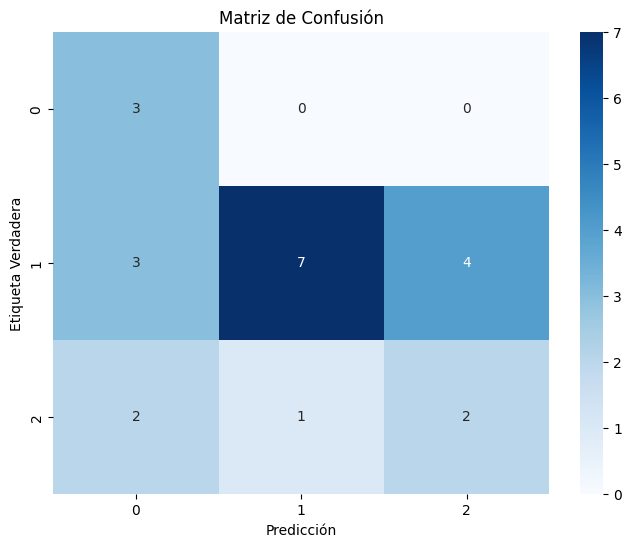

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()